Cleaning Time Series Data : Time Series Talk

 https://www.youtube.com/watch?v=7_Js8h709Dw

In [11]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import functions as main

# Read the Data

In [3]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_daily.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [5]:
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))

In [7]:
opencsv

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,JPY_EUR,SPY,QQQ,EXSA,...,GLD,SLV,TLT,BND,BTC_Close,Nr_Transactions,Nr_Addresses,BTC_PageViews,Crypto_PageViews,BTC_Supply
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-30,0.06270,2.442132e+02,NaN,NaN,1.303900,0.011569,0.008870,84.992340,40.332348,18.262423,...,115.489998,17.580000,68.869255,55.121548,0.00,325.0,374.0,NaN,NaN,3.561700e+06
2010-07-31,0.06785,2.442132e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,295.0,339.0,NaN,NaN,3.571850e+06
2010-08-01,0.06110,2.442132e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,364.0,429.0,NaN,NaN,3.583800e+06
2010-08-02,0.06110,2.442132e+02,NaN,8585.3,1.317593,0.011548,0.008760,86.911568,41.089523,18.607929,...,115.540001,17.959999,67.902458,55.109386,0.00,398.0,431.0,NaN,NaN,3.595900e+06
2010-08-03,0.06000,2.442132e+02,NaN,NaN,1.322506,0.011658,0.008810,86.495377,40.913437,18.756001,...,115.989998,18.020000,68.294418,55.257935,0.00,648.0,701.0,NaN,NaN,3.607250e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22,67567.71000,8.204773e+13,9.717579e+09,NaN,1.089918,0.006352,0.005828,554.650024,482.320007,51.220001,...,221.800003,26.629999,92.342178,72.468529,68155.67,824999.0,504554.0,4558.0,38.0,1.972959e+07
2024-07-23,65939.83000,8.204773e+13,1.451503e+10,NaN,1.088981,0.006374,0.005850,553.780029,480.619995,51.310001,...,222.580002,26.680000,92.212608,72.478493,67597.26,838977.0,480641.0,4484.0,30.0,1.973012e+07
2024-07-24,65375.53000,8.204773e+13,8.943564e+09,NaN,1.085069,0.006420,0.005917,541.229980,463.380005,50.980000,...,221.800003,26.430000,91.215927,72.269135,65920.76,596458.0,484767.0,4584.0,32.0,1.973056e+07


In [22]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(series, color='red')

    for year in range(2010, 2025):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

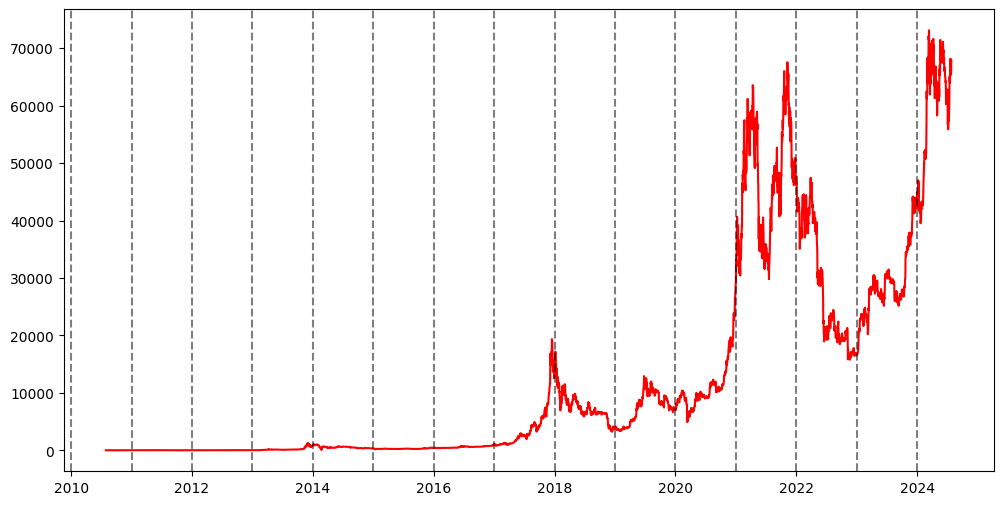

In [23]:
BTC_series = opencsv.BTC_USD
plot_series(BTC_series)

**A VAR training model workflow**

![image info](./VAR_Training_Model_Worflow.png)

source: https://www.ikigailabs.io/multivariate-time-series-forecasting-in-python-settings/vector-autoregression-python

# ADF test

In [ ]:
# Individual Test

from statsmodels.tsa.stattools import adfuller

# If p-value is not less than .05, we reject the null hypothesis. This means the time series is stationary.

# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

# HA: The time series is stationary.

#perform augmented Dickey-Fuller test
adfuller(BTC_series)

(-25.559251780960345,
 0.0,
 7,
 5102,
 {'1%': -3.431632358513106,
  '5%': -2.862106666289463,
  '10%': -2.567071636724501},
 14407.236863420447)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Dictionary to store the p-values
p_values = {}
stationary = []
non_stationary = []

# Loop through each column in the DataFrame
for column in opencsv.columns:
    # Perform ADF test
    result = adfuller(opencsv[column].dropna())  # Drop NA values if any
    p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

    if p_values[column] < 0.05:
       stationary.append(column)
    else:
        non_stationary.append(column) 

In [ ]:
p_values

{'BTC_USD': 0.9027795541975625,
 'Mining_Difficulty': 1.0,
 'USD_OnChain_Volume': 0.4170067762720183,
 'M2_Liquidity': 0.8934649836522045,
 'EUR_USD': 0.4146402582110366,
 'JPY_USD': 0.8737802713242484,
 'JPY_EUR': 0.0,
 'SPY': 0.9955698362621008,
 'QQQ': 0.9942276017109918,
 'EXSA': 0.9263706618749487,
 'JPXN': 0.7817601599092736,
 'IWDA': 0.9869203485287745,
 'GLD': 0.8763761071312349,
 'SLV': 0.3422902738893362,
 'TLT': 0.39558105691199447,
 'BND': 0.5033216152299345,
 'BTC_Close': 0.8805727893299111,
 'Nr_Transactions': 0.8792255742092484,
 'Nr_Addresses': 0.4356326676536857,
 'BTC_PageViews': 0.0002124319355504909,
 'Crypto_PageViews': 0.013866060601908706,
 'BTC_Supply': 1.5941832631742695e-06}

In [ ]:
stationary

['JPY_EUR', 'BTC_PageViews', 'Crypto_PageViews', 'BTC_Supply']

In [ ]:
non_stationary

['BTC_USD',
 'Mining_Difficulty',
 'USD_OnChain_Volume',
 'M2_Liquidity',
 'EUR_USD',
 'JPY_USD',
 'SPY',
 'QQQ',
 'EXSA',
 'JPXN',
 'IWDA',
 'GLD',
 'SLV',
 'TLT',
 'BND',
 'BTC_Close',
 'Nr_Transactions',
 'Nr_Addresses']

In [83]:
modify_df = opencsv.copy()
modify_df.drop(columns=stationary, inplace=True)
modify_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,BTC_Close,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,
2010-07-30,0.06270,2.442132e+02,NaN,NaN,1.303900,0.011569,84.992340,40.332348,18.262423,32.519962,19.209999,115.489998,17.580000,68.869255,55.121548,0.00,325.0,374.0
2010-07-31,0.06785,2.442132e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,295.0,339.0
2010-08-01,0.06110,2.442132e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,364.0,429.0
2010-08-02,0.06110,2.442132e+02,NaN,8585.3,1.317593,0.011548,86.911568,41.089523,18.607929,33.195183,19.500000,115.540001,17.959999,67.902458,55.109386,0.00,398.0,431.0
2010-08-03,0.06000,2.442132e+02,NaN,NaN,1.322506,0.011658,86.495377,40.913437,18.756001,33.109806,19.450001,115.989998,18.020000,68.294418,55.257935,0.00,648.0,701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22,67567.71000,8.204773e+13,9.717579e+09,NaN,1.089918,0.006352,554.650024,482.320007,51.220001,74.940002,94.809998,221.800003,26.629999,92.342178,72.468529,68155.67,824999.0,504554.0
2024-07-23,65939.83000,8.204773e+13,1.451503e+10,NaN,1.088981,0.006374,553.780029,480.619995,51.310001,74.900002,95.709999,222.580002,26.680000,92.212608,72.478493,67597.26,838977.0,480641.0
2024-07-24,65375.53000,8.204773e+13,8.943564e+09,NaN,1.085069,0.006420,541.229980,463.380005,50.980000,73.480003,94.050003,221.800003,26.430000,91.215927,72.269135,65920.76,596458.0,484767.0


# Normalize

In [24]:
avg = BTC_series.mean()
dev = BTC_series.std()

In [25]:
BTC_series = (BTC_series - avg) / dev

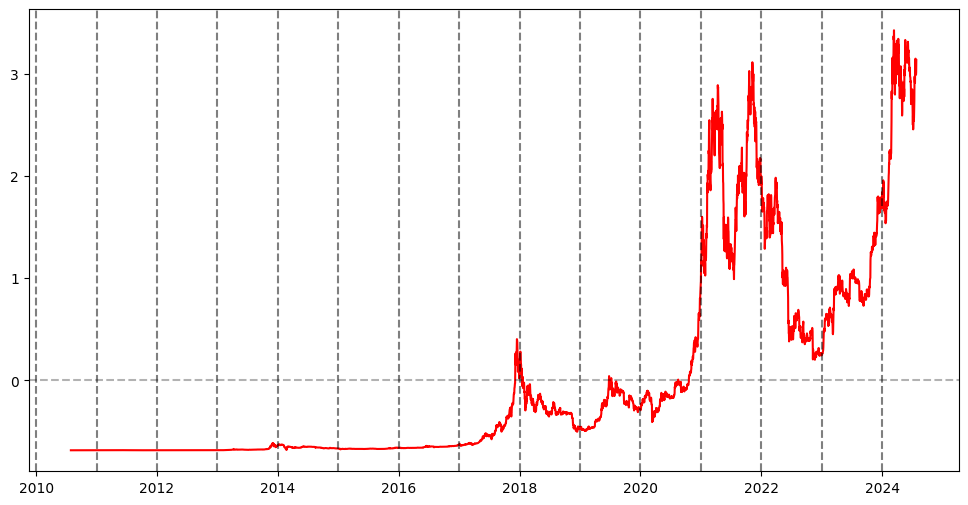

In [26]:
plot_series(BTC_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Take First Difference to Remove Trend

In [27]:
BTC_series = BTC_series.diff().dropna()

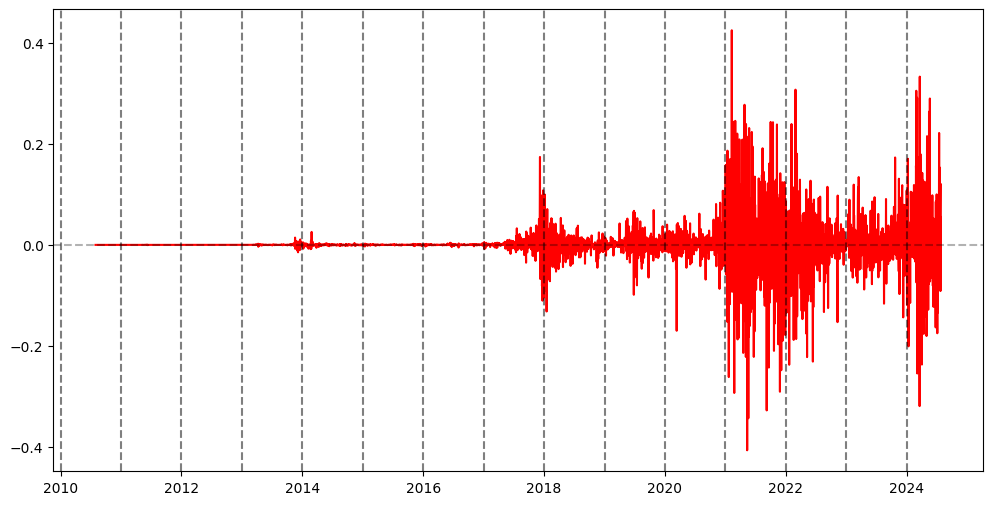

In [28]:
plot_series(BTC_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Increasing Volatility

In [33]:
annual_volatility = BTC_series.groupby(BTC_series.index.year).std()

In [34]:
annual_volatility

Date
2010    0.000001
2011    0.000053
2012    0.000019
2013    0.002124
2014    0.002035
2015    0.000570
2016    0.000853
2017    0.021273
2018    0.021727
2019    0.018021
2020    0.023573
2021    0.108142
2022    0.057136
2023    0.036906
2024    0.096869
Name: BTC_USD, dtype: float64

In [38]:
BTC_annual_vol = BTC_series.index.map(lambda d: annual_volatility.loc[d.year])

In [39]:
BTC_annual_vol

Index([1.0411748218228139e-06, 1.0411748218228139e-06, 1.0411748218228139e-06,
       1.0411748218228139e-06, 1.0411748218228139e-06, 1.0411748218228139e-06,
       1.0411748218228139e-06, 1.0411748218228139e-06, 1.0411748218228139e-06,
       1.0411748218228139e-06,
       ...
           0.0968686059565802,     0.0968686059565802,     0.0968686059565802,
           0.0968686059565802,     0.0968686059565802,     0.0968686059565802,
           0.0968686059565802,     0.0968686059565802,     0.0968686059565802,
           0.0968686059565802],
      dtype='float64', name='Date', length=5110)

In [40]:
BTC_series = BTC_series / BTC_annual_vol

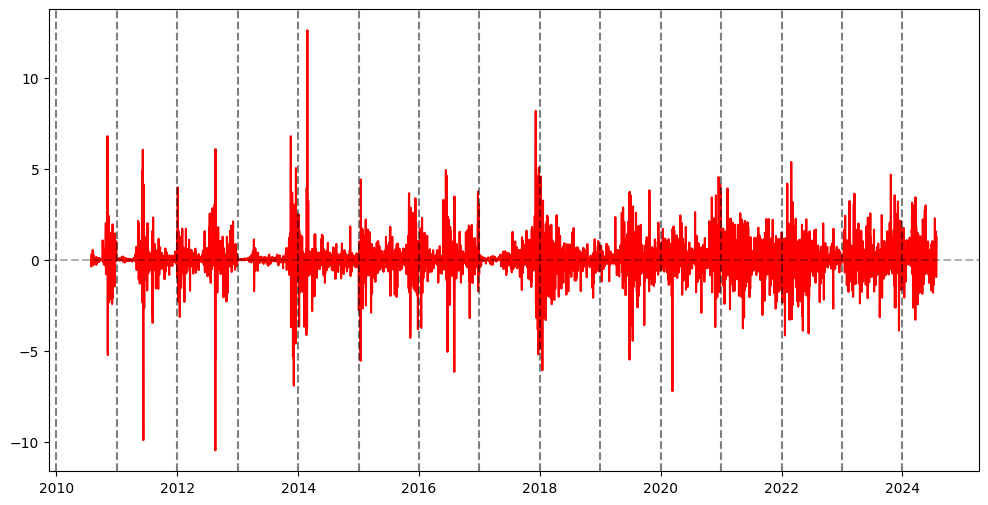

In [41]:
plot_series(BTC_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Seasonality

In [42]:
month_avgs = BTC_series.groupby(BTC_series.index.month).mean()

In [43]:
month_avgs

Date
1    -0.018101
2     0.046906
3     0.013458
4     0.019405
5     0.023209
6     0.041273
7     0.042635
8    -0.039273
9    -0.012658
10    0.119460
11    0.125478
12    0.111320
dtype: float64

In [44]:
BTC_month_avg = BTC_series.index.map(lambda d: month_avgs.loc[d.month])

In [45]:
BTC_month_avg

Index([ 0.04263530800763332, -0.03927288727915184, -0.03927288727915184,
       -0.03927288727915184, -0.03927288727915184, -0.03927288727915184,
       -0.03927288727915184, -0.03927288727915184, -0.03927288727915184,
       -0.03927288727915184,
       ...
        0.04263530800763332,  0.04263530800763332,  0.04263530800763332,
        0.04263530800763332,  0.04263530800763332,  0.04263530800763332,
        0.04263530800763332,  0.04263530800763332,  0.04263530800763332,
        0.04263530800763332],
      dtype='float64', name='Date', length=5110)

In [46]:
BTC_series = BTC_series - BTC_month_avg

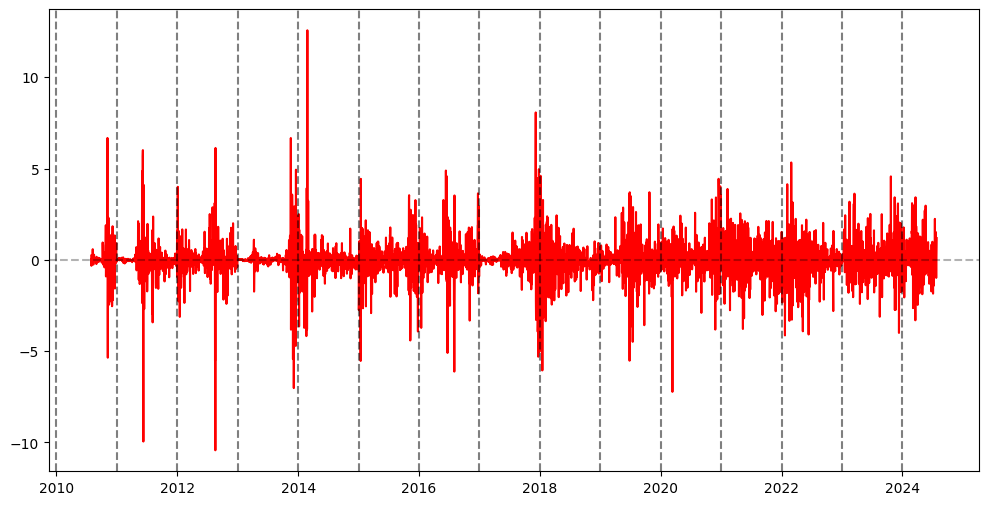

In [47]:
plot_series(BTC_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)